<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
import pandas as pd
movie_reviews = pd.read_csv('/content/movie_reviews_sentiment.csv')
movie_reviews=movie_reviews[["Reviews","Sentiment"]]
movie_reviews.head()

,Reviews,Sentiment
0,one anticipated film year many people included...,Positive
1,youll wit brain fully switched watching oppenh...,Negative
2,im big fan nolans work really looking forward ...,Positive
3,oppenheimer biographical thriller film written...,Positive
4,movie wow dont think ever felt like watching m...,Positive


In [2]:
import nltk   #cleaning
movie_reviews['Reviews'] = movie_reviews['Reviews'].str.replace('[^\w\s]','')  #removal of punctuation
movie_reviews['Reviews'] = movie_reviews['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
movie_reviews['Reviews'] = movie_reviews['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(movie_reviews['Reviews']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [4]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [5]:
model.print_topics(num_topics = 10, num_words = 10)

[(0,
  '0.024*"movie" + 0.024*"oppenheimer" + 0.014*"time" + 0.014*"much" + 0.014*"act" + 0.010*"one" + 0.010*"bomb" + 0.010*"nolan" + 0.010*"man" + 0.010*"great"'),
 (1,
  '0.032*"oppenheimer" + 0.028*"film" + 0.021*"feel" + 0.019*"one" + 0.014*"time" + 0.012*"like" + 0.012*"sound" + 0.012*"political" + 0.012*"psychological" + 0.012*"though"'),
 (2,
  '0.019*"film" + 0.019*"great" + 0.015*"hour" + 0.011*"oppenheimer" + 0.011*"time" + 0.011*"brilliant" + 0.011*"could" + 0.011*"performance" + 0.008*"long" + 0.008*"audiovisual"'),
 (3,
  '0.027*"movie" + 0.018*"story" + 0.013*"nolan" + 0.013*"one" + 0.011*"get" + 0.011*"maybe" + 0.011*"go" + 0.011*"much" + 0.009*"really" + 0.009*"also"'),
 (4,
  '0.035*"movie" + 0.014*"one" + 0.012*"like" + 0.010*"also" + 0.010*"nolan" + 0.010*"oppenheimer" + 0.009*"hollywood" + 0.009*"much" + 0.009*"actor" + 0.009*"christopher"'),
 (5,
  '0.022*"oppenheimer" + 0.016*"film" + 0.016*"really" + 0.014*"scene" + 0.014*"one" + 0.012*"actor" + 0.011*"movie" + 

Cluster 0:
This group of posts appears to concentrate on films, potentially talking about their narratives, artistry, and filmmakers. Christopher Nolan is referred to, implying conversations regarding his productions.

Cluster 1:
This group of comments seems to talk about movies, potentially referring to acting performances, viewing experiences, and the amount of time spent watching. It also looks to include references to certain people like Oppenheimer and possibly historical backgrounds.

Cluster 2:
This cluster talks about movies and possibly criticizes them for being too long or not satisfying. It also brings up specific scenes and may compare them to Nolan's directing style.

Cluster 3:
This group of comments refers to Oppenheimer and movie scenes, likely talking about their effect or importance. The discussion could also include comparisons between various movies or filmmakers.

Cluster 4:
 It likely mentions certain books or narratives that have been adapted into movies. The cluster also includes references to Nolan, implying it discusses films directed by Christopher Nolan that were shot partially or fully in IMAX.

Cluster 5:
This group discusses movies, centering on the feelings and emotions that the plot brings out in the viewer. It also talks about the length of the film and makes comparisons to other films.

Cluster 6:
This group of sentences talks about Oppenheimer and movies, likely analyzing the topics of time and explosives. It also refers to performers such as Robert Downey Jr.

Cluster 7:
This cluster focuses on movies. It likely includes comments about the length of films, specific scenes in them, and Hollywood's impact on the movie industry. Oppenheimer comes up again in the cluster, implying that there may be talks about historical or biographical movies.

Cluster 8:
This cluster talks about Oppenheimer, films, and performances, likely analyzing historical events shown in movies and the influence they have.

Cluster 9:
This cluster talks about Oppenheimer and films, potentially making comparisons between them regarding their quality and acting. There could be conversations about particular performers such as Cillian Murphy.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

I am selecting the both Reviews and Sentiment columns. As sentiment analyis is a supervised learning techniques, I will use Reviews as independent variable and Sentiment as dependent variable to build the machine learning model.

In [6]:
movie_reviews.head()

,Reviews,Sentiment
0,one anticipated film year many people included...,Positive
1,youll wit brain fully switched watching oppenh...,Negative
2,im big fan nolans work really looking forward ...,Positive
3,oppenheimer biographical thriller film written...,Positive
4,movie wow dont think ever felt like watching m...,Positive


In [7]:
movie_reviews['Sentiment'].value_counts()

Sentiment
Positive    818
Neutral     160
Negative     22
Name: count, dtype: int64

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf.fit(movie_reviews['Reviews'])
x_values =  tf_idf.transform(movie_reviews['Reviews'])
y_values = movie_reviews['Sentiment']
# Split the training data to training and validating data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

In [9]:
from sklearn import metrics
def evaluation(y_pred, y_test):
    Accuracy = metrics.accuracy_score(y_pred, y_test)
    Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
    print("Accuracy: ", Accuracy.round(4))
    print("Recall:", Recall.round(4))
    print("Precision:", Precision.round(4))
    print("F-1 score:", F1.round(4))

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
decision_tree_implement = DecisionTreeClassifier()
decision_tree_implement.fit(x_train,y_train)
y_pred_valid = decision_tree_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(decision_tree_implement, x_valid, y_valid, cv= KFold(5, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.985
Recall: 0.985
Precision: 0.985
F-1 score: 0.985
Cross Validation Score: 0.985


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [11]:
from sklearn import svm
svm_implement = svm.SVC()
svm_implement.fit(x_train,y_train)
y_pred_valid = svm_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)
print("Cross Validation Score:", cross_val_score(svm_implement, x_valid, y_valid, cv= KFold(5, shuffle=True, random_state = 22)).mean().round(4))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy:  0.985
Recall: 0.985
Precision: 0.985
F-1 score: 0.985
Cross Validation Score: 0.985


Above I built machine learning classification model using Decision Tree and Support Vector Machines. The accuracy, recall, precision and F1 Score of both the models are same. So out of the above two models any one model can be used for furthur predictionsd.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [12]:
train_data = pd.read_csv('/content/train.csv')
test_data= pd.read_csv('/content/test.csv')
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


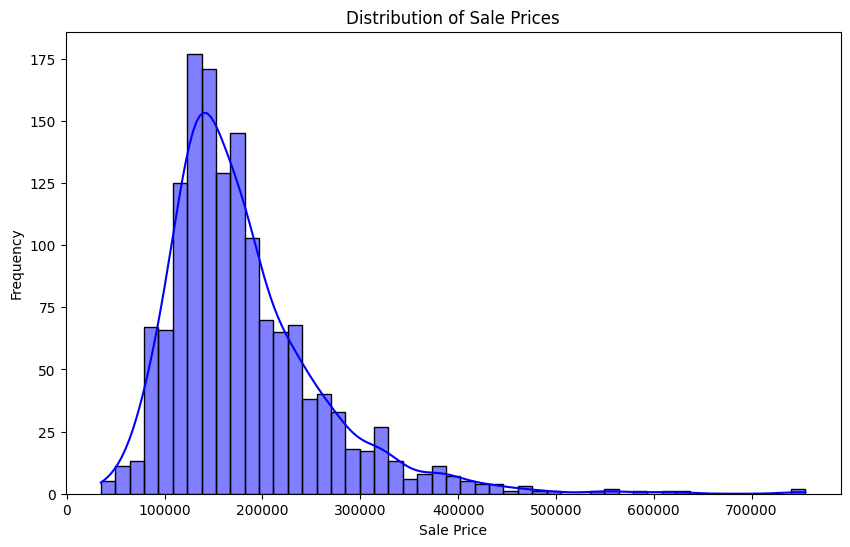

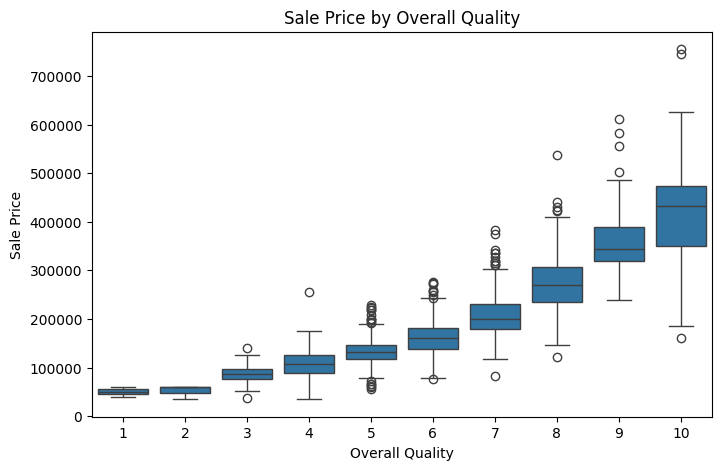

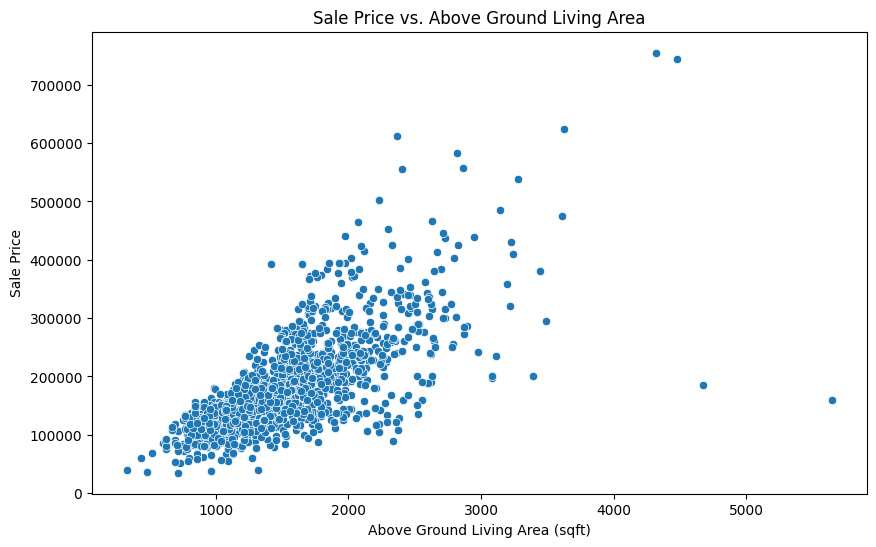

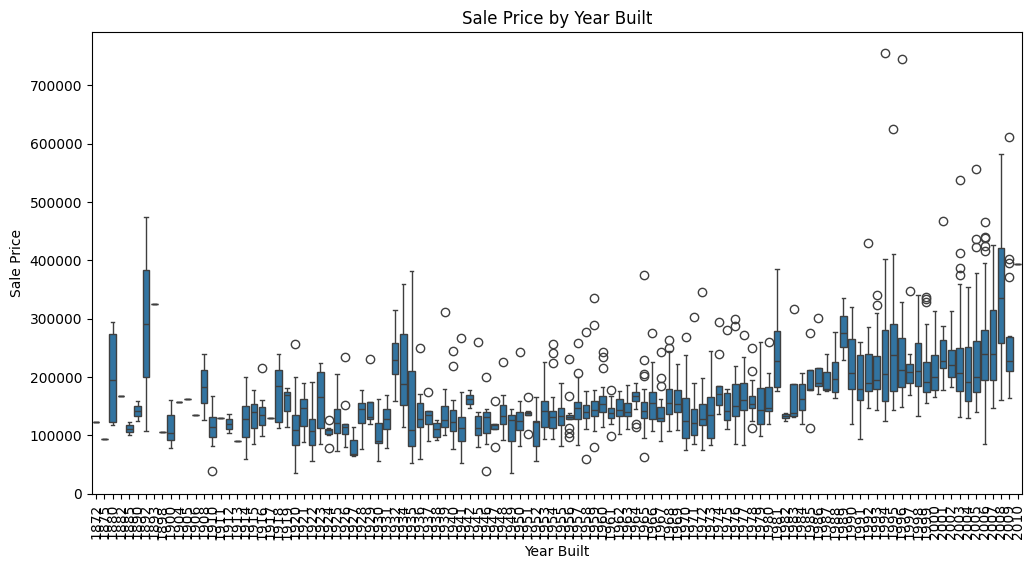

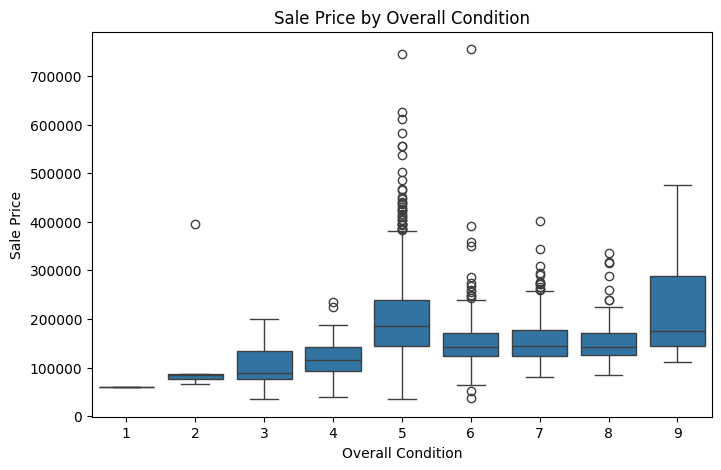

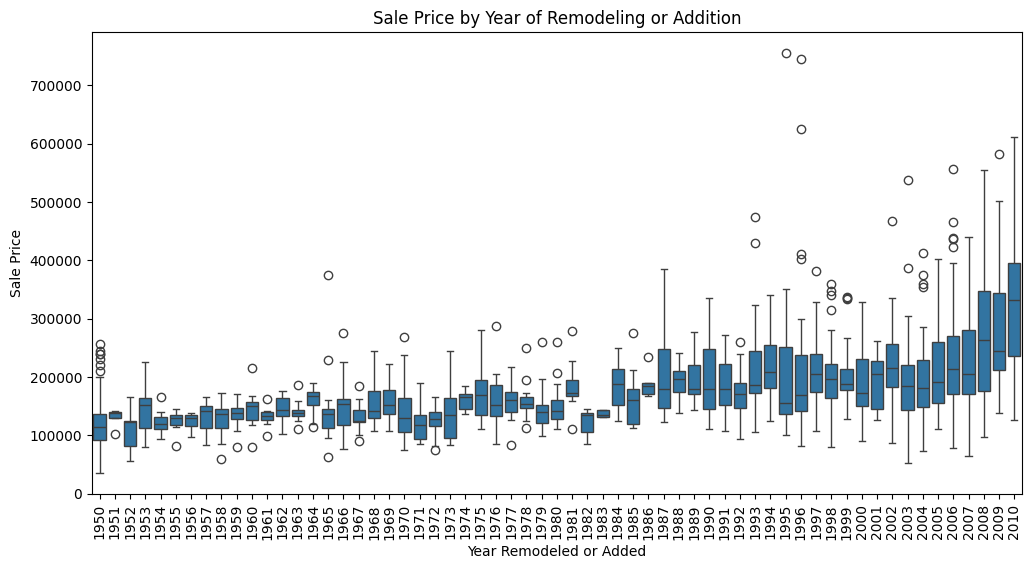

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# EDA for 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()
# EDA for 'OverallQual'
plt.figure(figsize=(8, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()
# EDA for 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()
# EDA for 'YearBuilt'
plt.figure(figsize=(12, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=train_data)
plt.title('Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()
# EDA for 'OverallCond'
plt.figure(figsize=(8, 5))
sns.boxplot(x='OverallCond', y='SalePrice', data=train_data)
plt.title('Sale Price by Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()
# EDA for 'YearRemodAdd'
plt.figure(figsize=(12, 6))
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=train_data)
plt.title('Sale Price by Year of Remodeling or Addition')
plt.xlabel('Year Remodeled or Added')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

train_data = train_data.select_dtypes(include=['number']).interpolate().dropna()
test_data = test_data.select_dtypes(include=['number']).interpolate().dropna()

x_training_data = train_data.drop(['SalePrice','Id'], axis=1)
y_training_data = np.log(train_data.SalePrice)


x_train, x_test, y_train, y_test = train_test_split(x_training_data,y_training_data,random_state = 40, test_size=0.3)


regression = LinearRegression()
regression.fit(x_train,y_train)

y_pred = regression.predict(x_test)

In [17]:
print('Linear Regression R squared": %.4f' % regression.score(x_test, y_test))

Linear Regression R squared": 0.8804


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin = mean_squared_error(np.exp(y_pred), y_test)
lin_r = np.sqrt(lin)
print(lin_r)

188802.18310280956


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


BERT, a transformers model, is pretrained on extensive English data without human labeling, using an automatic process to generate inputs and labels. Its pretraining objectives include Masked Language Modeling (MLM), predicting masked words within a sentence, and Next Sentence Prediction (NSP), understanding contextual relationships between sentences. With variations like base, large, and multilingual models, BERT learns bidirectional representations of language, capturing semantic relationships. Whole Word Masking enhances preprocessing. Trained on BookCorpus and English Wikipedia, BERT's diverse dataset enables it to grasp linguistic patterns effectively. Renowned for its versatility, BERT excels in tasks like classification, question answering, and sentiment analysis, owing to its robust pretraining process and expansive dataset.

In [19]:
from huggingface_hub import notebook_login
notebook_login()

In [20]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [22]:
def prepare_data(dataset):
    X = movie_reviews['Reviews'].values
    y = movie_reviews['Sentiment'].values

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train.tolist()
    X_test = X_test.tolist()

    return X_train, X_test, y_train, y_test, label_encoder

In [23]:
def tokenize_data(texts,tokenizer):
    return tokenizer.batch_encode_plus(texts, padding=True, truncation=True, return_tensors='pt')

def prepare_dataset(X_train, X_test, y_train, y_test,tokenizer):
    # Tokenizing the text data

    train_encodings = tokenize_data(X_train,tokenizer)
    test_encodings = tokenize_data(X_test,tokenizer)

    # Creating TensorDataset
    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train))
    test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test))

    return train_dataset, test_dataset

In [24]:
def train_model(model, train_loader, optimizer, device, epochs):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

In [25]:
def evaluate_model(model, test_loader, device):
    model.eval()
    predictions = []
    true_labels = []

    for batch in test_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).cpu().tolist())
        true_labels.extend(labels.cpu().tolist())

    return predictions, true_labels

In [26]:
def calculate_metrics(true_labels, predicted_labels, label_encoder):
    predicted_labels = label_encoder.inverse_transform(predicted_labels)
    true_labels = label_encoder.inverse_transform(true_labels)

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    return accuracy, precision, recall, f1

In [27]:
def data_pipeline(file_path, model_name='bert-base-uncased', learning_rate=1e-5, epochs=1):
    # Loading data
    dataset = load_data(file_path)

    # Preparing data
    X_train, X_test, y_train, y_test, label_encoder = prepare_data(dataset)

    # Loading tokenizer and model
    tokenizer = BertTokenizer.from_pretrained(model_name)  # Moved tokenizer creation here
    model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))

    # Preparing datasets
    train_dataset, test_dataset = prepare_dataset(X_train, X_test, y_train, y_test, tokenizer)  # Pass tokenizer

    # Creating DataLoader
    batch_size = 16
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Fine-tuning model
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_model(model, train_loader, optimizer, device, epochs)

    # Evaluating the fine-tuned model
    predictions, true_labels = evaluate_model(model, test_loader, device)

    # Calculating metrics
    accuracy, precision, recall, f1 = calculate_metrics(true_labels, predictions, label_encoder)

    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

In [28]:
data_pipeline('/content/movie_reviews_sentiment.csv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Accuracy: 0.77, Precision: 0.5929, Recall: 0.77, F1 Score: 0.6699435028248587


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Advantages of BERT:**
BERT provides bidirectional representation and it is pretrained on extensive data for versatile applicability across tasks such as classification. Due to its multilingual support, it has enhances utility in diverse linguistic environments.

**Disadvantages of BERT:**
BERT requires a lot of computational resources and longer inference times. Fine-tuning complexity and interpretability challenges may hinder its seamless integration into certain applications.